# Team Members 

## RaviKiran Bhat
## Rubanraj Ravichandran
## Mohammad Wasil
## Ramesh Kumar

## Task 1
Use NumPy function to draw random samples from a normal (Gaussian) distribution.
- Create a set of 2000 samples using NumPy function. This data set should be distributed as a Gaussian with mean=0 and standard deviation (std)=0.2
- For the created data set verify the mean and the variance
- Display/plot the histogram of the samples, along with the probability density function using matplotlib.pyplot and np functions


In [15]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
from sklearn.neighbors import KernelDensity
%matplotlib inline

In [2]:
#Creation of samples
mean = 0
std_dev = 0.2,
size = 2000
samples = np.random.normal(mean,std_dev,size=size)

In [3]:
#Verification of mean
np.mean(samples)

-0.00054996879354017429

In [4]:
#Verification of variance
variance = np.var(samples)
variance

0.040728806864517693

In [5]:
#Verification of standard deviation
sd = np.sqrt(variance)
sd

0.20181379255273335

/home/ramesh/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


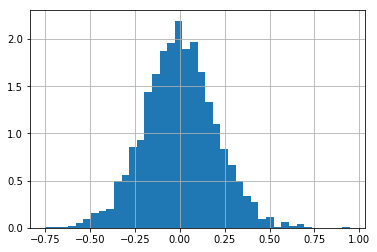

In [6]:
#Histogram plot
plt.grid(True)
_= plt.hist(samples, normed=1, bins=40)


## Task 2
Two-dimensional kernel density estimate: comparing scikit-learn and scipy

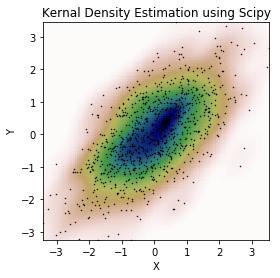

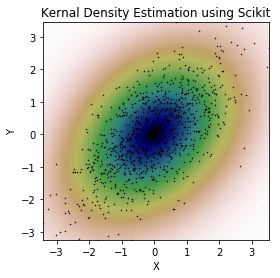

In [14]:
# Generate two dimensional data

def kde_Scipy(m1, m2):
    
    xmin = m1.min()
    xmax = m1.max()
    ymin = m2.min()
    ymax = m2.max()
    
    #perform a kernal density estimate on the data
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([m1, m2])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    
    fig, ax = plt.subplots()
    ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    ax.plot(m1, m2, 'k.', markersize=1)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    ax.set_title("Kernal Density Estimation using Scipy")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    
    plt.show()
    
def kde_scikit(m1, m2):
    
    XY = np.vstack([m1,m2])
#     d = XY.shape[0]
#     n = XY.shape[1]
    
    kde = KernelDensity(kernel='gaussian').fit(XY.T)
    
    
    xmin = m1.min()
    xmax = m1.max()
    ymin = m2.min()
    ymax = m2.max()
    
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])

    Z = np.reshape(np.exp(kde.score_samples(positions.T)), X.shape)
    fig, ax = plt.subplots()
    ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    
    ax.plot(m1, m2, 'k.', markersize=1)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    ax.set_title("Kernal Density Estimation using Scikit")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    
def generate_measurements():
    
    # Generate two dimensional data
    N1 = np.random.normal(scale=1.0,size=1000)
    N2 = np.random.normal(scale=0.5, size=1000)
    # generate coupled measurements
    x = N1 + N2
    y = N1 - N2
    
    return x, y

m1, m2 = generate_measurements()
kde_Scipy(m1, m2)
kde_scikit(m1, m2)
